# 图像锐化

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [5]:
def sharpening(src):
    rgb = np.float64(src)
    dst = np.zeros_like(rgb)
    rows,cols = rgb.shape[0],rgb.shape[1]
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            sr = rgb[i,j,0]
            sg = rgb[i,j,1]
            sb = rgb[i,j,2]
            
            b = np.abs(5 * sb - rgb[i-1,j,2] - rgb[i+1,j,2] - rgb[i,j+1,2] - rgb[i,j-1,2])
            g = np.abs(5 * sg - rgb[i-1,j,1] - rgb[i+1,j,1] - rgb[i,j+1,1] - rgb[i,j-1,1])
            r = np.abs(5 * sr - rgb[i-1,j,0] - rgb[i+1,j,0] - rgb[i,j+1,0] - rgb[i,j-1,0])

            dst[i,j,0] = r
            dst[i,j,1] = g
            dst[i,j,2] = b
    dst[dst > 255] = 255
    dst[dst < 0] = 0
    
    return dst

In [8]:
dst = sharpening(src)
dst = cv2.convertScaleAbs(dst)

Text(0.5,1,'Sharpening')

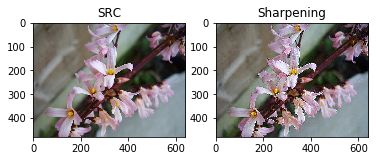

In [9]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Sharpening')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44917077